<a href="https://colab.research.google.com/github/Digitalastra/Digitalastra--Enhancing-Crop-Yield-and-Production-Efficiency-Using-Machine-Learning/blob/main/Enhancing_Crop_Yield_and_Production_Efficiency_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement: Enhancing Crop Yield and Production Efficiency Using Machine Learning

Agricultural productivity is a critical factor in ensuring food security and sustainability, especially in the face of growing global population and climate change. Your task is to develop a robust machine learning model to predict and optimize crop yield based on various factors, including but not limited to soil conditions, weather patterns, crop type, and farming practices.

The objective is to not only accurately predict crop yield but also to provide actionable insights that can guide farmers in making data-driven decisions to enhance productivity.

Dataset - https://www.kaggle.com/datasets/akshatgupta7/crop-yield-in-indian-states-dataset

### Challenges:
 1. Data Processing
- Handling Missing Values: Identify missing values in the dataset and decide on appropriate imputation techniques or strategies for handling them.
- Data Cleaning: Detect and correct inaccuracies, inconsistencies, or errors in the data, such as incorrect entries or anomalies.
- Removing Duplicates: Identify and remove duplicate rows that may skew the model’s performance.
- Outlier Detection: Identify and handle outliers that could disproportionately affect the model’s training and predictions.
- Data Normalization: Standardize or normalize data to ensure that different features contribute equally to the model's training process.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('crop_yield.csv')

print(df.head())


print(df.isnull().sum())


numeric_columns = df.select_dtypes(include=np.number).columns
non_numeric_columns = df.select_dtypes(exclude=np.number).columns


df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


for col in non_numeric_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


df = df.drop_duplicates()


z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]


scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Data processed successfully.")

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64
Data pro

In [2]:
# print(len(df['State'].unique()))
# print(len(df['State'].unique()))
# print(len(df['Crop'].unique()))
# print(len(df['Area'].unique()))
# print(len(df['Yield'].unique()))
# print(len(df['Annual_Rainfall'].unique()))
# print(len(df['Fertilizer'].unique()))
# print(len(df['Pesticide'].unique()))


print(df[['Crop_Year', 'Season']])

print(len(df['Season'].unique()))
print(len(df['Crop_Year'].unique()))

df.drop(['Season', 'Crop_Year'], axis=1, inplace=True)


       Crop_Year       Season
0       0.000000  Whole Year 
1       0.000000  Kharif     
2       0.000000  Kharif     
4       0.000000  Kharif     
5       0.000000  Whole Year 
...          ...          ...
19684   0.043478  Kharif     
19685   0.043478  Rabi       
19686   0.000000  Kharif     
19687   0.000000  Kharif     
19688   0.000000  Rabi       

[18833 rows x 2 columns]
6
24


2. Feature Selection
- Feature Relevance: Evaluate the relevance of each feature in predicting crop yield. Determine which features are most influential.
- Feature Redundancy: Identify and remove redundant features that provide no additional value to the model.


Selected Features: ['Production', 'Annual_Rainfall', 'Fertilizer', 'Area', 'Pesticide']
Correlation with Yield: Production         0.334144
Annual_Rainfall    0.023282
Fertilizer         0.013388
Area               0.012245
Pesticide          0.011561
Name: Yield, dtype: float64


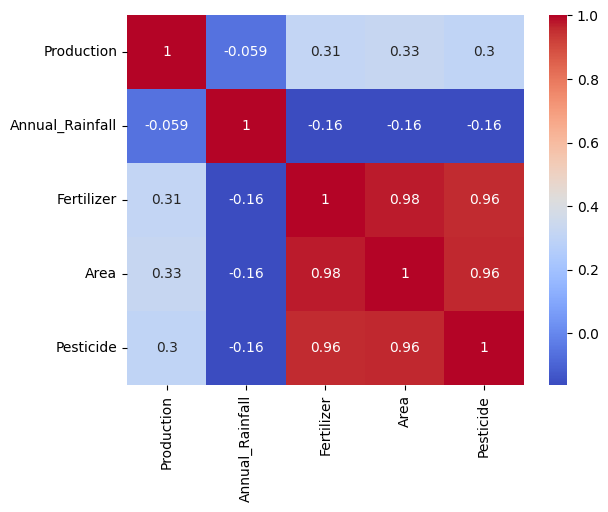

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=np.number)
numeric_columns = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_columns].corr()


target_corr = corr_matrix['Yield'].abs().sort_values(ascending=False)
top_features = target_corr.index[1:6]


df_selected = df[top_features]


print("Selected Features:", top_features.tolist())
print("Correlation with Yield:", target_corr[1:6])


sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm')
plt.show()

3. Feature Engineering
- Creating New Features: Develop new features that might better capture the relationships between inputs and crop yield. For example, interaction terms or aggregated features based on weather patterns.
- Feature Transformation: Apply transformations to existing features, such as logarithmic or polynomial transformations, to improve the model's ability to capture complex relationships.


In [9]:
from sklearn.preprocessing import PolynomialFeatures



print("Columns in DataFrame:", df.columns)


if 'Area' in df.columns and 'Annual_Rainfall' in df.columns:
    df['area_rainfall_interaction'] = df['Area'] * df['Annual_Rainfall']
else:
    print("Columns 'Area' and/or 'Annual_Rainfall' are missing from the DataFrame.")


if 'Annual_Rainfall' in df.columns and 'Fertilizer' in df.columns:
    poly = PolynomialFeatures(degree=2)
    poly_features = poly.fit_transform(df[['Annual_Rainfall', 'Fertilizer']])


    poly_features_df = pd.DataFrame(poly_features,
                                    columns=poly.get_feature_names_out(['Annual_Rainfall', 'Fertilizer']))


    df = pd.concat([df, poly_features_df], axis=1)
else:
    print("Columns 'Annual_Rainfall' and/or 'Fertilizer' are missing from the DataFrame.")

print("Data processing complete.")

Columns in DataFrame: Index(['Crop', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield'],
      dtype='object')
Data processing complete.


 4. Model Selection
- Choosing Algorithms: Evaluate and select appropriate machine learning algorithms based on the nature of the problem, such as regression models for continuous yield prediction.
- Algorithm Comparison: Compare different algorithms to determine which provides the best balance between accuracy and computational efficiency.

 5. Model Training and Grid Search
- Hyperparameter Tuning: Use techniques like Grid Search or Random Search to find the optimal hyperparameters for the selected algorithms.
- Training Process: Train the model on the prepared dataset, ensuring that it learns to generalise well to new, unseen data.
- Cross-Validation: Implement cross-validation to evaluate the model's performance and avoid overfitting by ensuring it performs well on different subsets of the data.

 6. Model Evaluation
- Performance Metrics: Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared to assess the model's accuracy and performance.



In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


X = df_encoded.drop('Yield', axis=1)
y = df_encoded['Yield']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f'Cross-Validation MSE: {mean_cv_mse}')


y_pred = best_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')





Categorical columns: Index(['Crop', 'State'], dtype='object')
Cross-Validation MSE: 0.00010371398166132023
MAE: 0.0008851271175964328
MSE: 6.149677568367152e-05
R-squared: 0.6899991991180657


In [6]:
import joblib


joblib.dump(best_model, 'best_model.pkl')


model = joblib.load('best_model.pkl')


In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)


joblib.dump(scaler, 'scaler.pkl')




['scaler.pkl']

In [8]:
poly = PolynomialFeatures(degree=2)

joblib.dump(poly, 'poly.pkl')

['poly.pkl']

### this part for vs code or any other code editor.

In [10]:
# !pip install fastapi uvicorn pyngrok nest_asyncio
# from fastapi import FastAPI, HTTPException
# from pydantic import BaseModel
# import pandas as pd
# import numpy as np
# import joblib
# from typing import Dict

# app = FastAPI()


# model = joblib.load('best_model.pkl')
# poly = joblib.load('poly.pkl')
# scaler = joblib.load('scaler.pkl')


# class PredictRequest(BaseModel):
#     Annual_Rainfall: float
    # Crop_Barley: float
    # Crop_Banana: float
    # Area: float
    # Crop_Cashewnut: float
    # Fertilizer : float

# @app.post('/predict')
# async def predict(request: PredictRequest):
#     data = request.dict()


#     df_input = pd.DataFrame([data])


#     required_features = ['Annual_Rainfall', 'Area', 'Fertilizer']
#     missing_features = [feature for feature in required_features if feature not in df_input.columns]
#     if missing_features:
#         raise HTTPException(status_code=400, detail=f"Missing features: {', '.join(missing_features)}")


#     numeric_columns = df_input.select_dtypes(include=np.number).columns
#     df_input[numeric_columns] = scaler.transform(df_input[numeric_columns])


#     if 'Fertilizer' in df_input.columns and 'Annual_Rainfall' in df_input.columns:
#         poly_features = poly.transform(df_input[['Annual_Rainfall', 'Fertilizer']])
#         poly_features_df = pd.DataFrame(poly_features,
#                                         columns=poly.get_feature_names_out(['Annual_Rainfall', 'Fertilizer']))
#         df_input = pd.concat([df_input, poly_features_df], axis=1)


#     df_input_encoded = pd.get_dummies(df_input, drop_first=True)


#     model_features = model.feature_names_in_
#     missing_cols = set(model_features) - set(df_input_encoded.columns)
#     for col in missing_cols:
#         df_input_encoded[col] = 0
#     df_input_encoded = df_input_encoded[model_features]


#     prediction = model.predict(df_input_encoded)

#     return {'prediction': prediction.tolist()}

# if __name__ == '__main__':
#     import uvicorn
#     uvicorn.run(app, port=8001, log_level='debug')



